In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tools.eval_measures import rmse
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('tomm1.csv')

In [0]:
df.Date = pd.to_datetime(df.Date)
df = df.set_index("Date")

In [57]:
df.head()

,Model_Price
Date,
2010-01-01,14.0
2010-05-01,15.0
2010-08-01,15.0
2010-12-01,17.0
2010-01-15,15.0


In [0]:
train, test = df[:-450], df[-450:]

In [0]:
scaler = MinMaxScaler()
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

In [0]:
n_input = 12
n_features = 1
generator = TimeseriesGenerator(train, train, length=n_input, batch_size=6)

In [61]:
model = Sequential()
model.add(LSTM(200, activation='relu', input_shape=(n_input, n_features)))
model.add(Dropout(0.15))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')



Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



In [62]:
model.fit_generator(generator,epochs=180)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/100




179/179 [==============================] - 6s 33ms/step - loss: 0.0112
Epoch 2/100
179/179 [==============================] - 3s 20ms/step - loss: 0.0058
Epoch 3/100
179/179 [==============================] - 3s 19ms/step - loss: 0.0056
Epoch 4/100
179/179 [==============================] - 3s 19ms/step - loss: 0.0050
Epoch 5/100
179/179 [==============================] - 3s 19ms/step - loss: 0.0053
Epoch 6/100
179/179 [==============================] - 3s 19ms/step - loss: 0.0048
Epoch 7/100
179/179 [==============================] - 3s 19ms/step - loss: 0.0040
Epoch 8/100
179/179 [==============================] - 4s 20ms/step - loss: 0.0039
Epoch 9/100
179/179 [==============================] - 3s 19ms/step - loss: 0.0036
Epoch 10/100
179/179 [==============================] - 4s 20ms/step - loss: 0.0037
Epoch 11/100
179/179 [==============================] - 4s 20ms/step - 

In [0]:
pred_list = []

batch = train[-n_input:].reshape((1, n_input, n_features))

for i in range(n_input):   
    pred_list.append(model.predict(batch)[0]) 
    batch = np.append(batch[:,1:,:],[[pred_list[i]]],axis=1)

In [0]:
df_predict = pd.DataFrame(scaler.inverse_transform(pred_list),
                          index=df[-n_input:].index, columns=['Prediction'])

df_test = pd.concat([df,df_predict], axis=1)

No handles with labels found to put in legend.


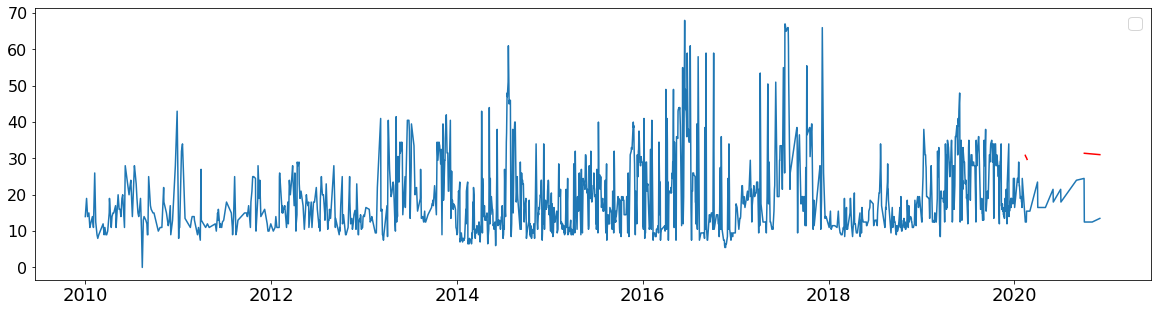

In [75]:
plt.figure(figsize=(20, 5))
plt.plot(df_test.index, df_test['Model_Price'])
plt.plot(df_test.index, df_test['Prediction'], color='r')
plt.legend(loc='best', fontsize='xx-large')
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.show()

In [76]:
pred_actual_rmse = rmse(df_test.iloc[-n_input:, [0]], df_test.iloc[-n_input:, [1]])
print("rmse: ", pred_actual_rmse)

rmse:  [nan]


In [0]:
train = df

In [0]:
scaler.fit(train)
train = scaler.transform(train)

In [0]:
n_input = 12
n_features = 1
generator = TimeseriesGenerator(train, train, length=n_input, batch_size=6)

In [70]:
model.fit_generator(generator,epochs=90)

Epoch 1/90
254/254 [==============================] - 5s 19ms/step - loss: 0.0029
Epoch 2/90
254/254 [==============================] - 5s 20ms/step - loss: 0.0028
Epoch 3/90
254/254 [==============================] - 5s 20ms/step - loss: 0.0030
Epoch 4/90
254/254 [==============================] - 5s 22ms/step - loss: 0.0030
Epoch 5/90
254/254 [==============================] - 5s 20ms/step - loss: 0.0029
Epoch 6/90
254/254 [==============================] - 5s 20ms/step - loss: 0.0028
Epoch 7/90
254/254 [==============================] - 5s 20ms/step - loss: 0.0027
Epoch 8/90
254/254 [==============================] - 5s 19ms/step - loss: 0.0029
Epoch 9/90
254/254 [==============================] - 5s 19ms/step - loss: 0.0028
Epoch 10/90
254/254 [==============================] - 5s 19ms/step - loss: 0.0028
Epoch 11/90
254/254 [==============================] - 5s 20ms/step - loss: 0.0029
Epoch 12/90
254/254 [==============================] - 5s 20ms/step - loss: 0.0028
Epoch 13/90
2

In [0]:
pred_list = []

batch = train[-n_input:].reshape((1, n_input, n_features))

for i in range(n_input):   
    pred_list.append(model.predict(batch)[0]) 
    batch = np.append(batch[:,1:,:],[[pred_list[i]]],axis=1)

In [0]:
from pandas.tseries.offsets import DateOffset
add_dates = [df.index[-1] + DateOffset(months=x) for x in range(0,13) ]
future_dates = pd.DataFrame(index=add_dates[1:],columns=df.columns)

In [0]:
df_predict = pd.DataFrame(scaler.inverse_transform(pred_list),
                          index=future_dates[-n_input:].index, columns=['Prediction'])

df_proj = pd.concat([df,df_predict], axis=1)

No handles with labels found to put in legend.


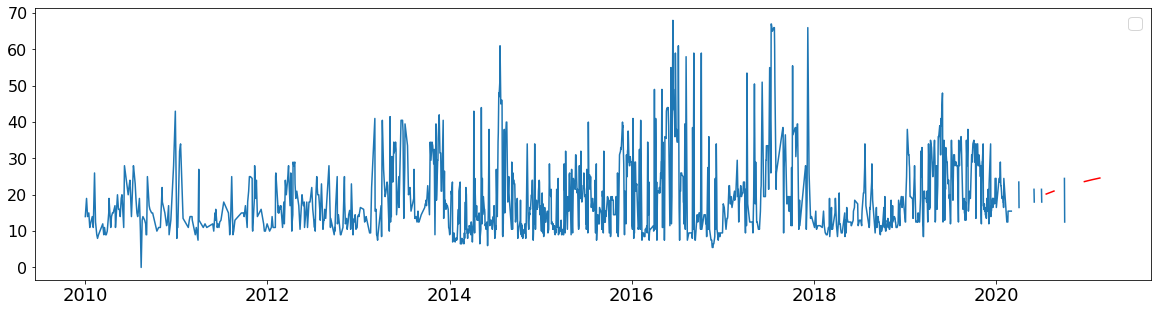

In [77]:
plt.figure(figsize=(20, 5))
plt.plot(df_proj.index, df_proj['Model_Price'])
plt.plot(df_proj.index, df_proj['Prediction'], color='r')
plt.legend(loc='best', fontsize='xx-large')
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.show()